<a href="https://colab.research.google.com/github/hiephamk/Data_Group_Project/blob/main/Assignment_01_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: Supervised Learning and kNN Algorithm

This assignment consists of two parts, completed within your assigned group.

##Part 1: Familiarization and Basic Testing of the kNN Algorithm (6 pts)

Dataset Selection (2 pts):
Choose an interesting dataset (other than the Iris dataset) from Kaggle to apply kNN classification.

Algorithm Application (2 pts):
Run the kNN algorithm on the selected dataset. You may use either a custom kNN implementation or the sklearn version.

Use Case Identification (2 pts):
List two real-world applications of the kNN algorithm. These can be business-related or other domains where kNN is valuable.

##Part 2: In-Depth Experimentation with the kNN Algorithm (6.5 pts)

Parameter Experimentation (2 pts):
Experiment with various values of k to observe changes in model performance.

Train-Test Split Analysis (2 pts):
Evaluate the effect of different train/test splits (e.g., 80/20) on your model’s accuracy.

k-Fold Cross-Validation (2.5 pts):
Apply a k-fold approach to your data and analyze the results.

Prepare to discuss your observations and findings within your group.

Submission Guidelines

Create a group video (maximum 15 minutes) showcasing your work on Parts 1 and 2:

Part 1 Overview:

Demonstrate the kNN algorithm running on a group member’s computer. Briefly mention each member’s experience with the algorithm to ensure all group members are involved.
Share your identified real-world kNN applications, and provide concise, clear explanations. Engage in a brief group discussion on these use cases in the video.
Part 2 Experiments:

Present and explain the experiments conducted with your dataset, summarizing the key findings. While not all experiments may be covered in detail, provide a thorough overview of your major insights.
Highlight each member’s contributions to the experimentation process.
This video should clearly communicate both your technical findings and collaborative efforts.

Upload your files to a cloud repository (e.g., OneDrive, Google Drive) and share a single link that grants access to all required files, including the video, notebook code file, and dataset.

# 1. Data Preprocessing
The dataset used in this project is originally from NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases). The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

###**1.1. Import libraries and Load the data**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/hiephamk/Data_Group_Project/main/health_care_diabetes.csv')

In [ ]:
# Display the first 10 rows of the data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


###**1.2. Data exploration**

In [ ]:
# Check data types and get overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Display summary information
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Original information:**

* Dataset has 768 samples and 9 columns.
* The columns include: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome.
* Outcome is the label column (label), with a value of 0 or 1 (classify people with or without diabetes).

There is no missing value in dataset, but some columns like SkinThickness, Insulin with a value of 0, this may need to be processed because these 0 values are unreasonable in the medical context.

In [ ]:
# View data statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above statistics, we can see that there are several several columns with zero values: Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Replace zeros in specified columns with the mean of each column (ignoring zero values)
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# Replacing zeros in relevant columns with the mean of non-zero values for each column
for column in columns_to_replace:
    non_zero_mean = df[df[column] != 0][column].mean()
    df[column] = df[column].replace(0, non_zero_mean)



In [ ]:
# Display the updated dataset to verify the changes
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


The values are 0 in the columns Glucose, BloodPressure, SkinThickness, Insulin, BMI has been replaced with the average of each column (calculated on values not equal to 0).

In [ ]:
# Check n/a value
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Check duplicate values
df.duplicated().sum()

0

This result shows that there is no missing values, no N.A values, and no duplicate values in the dataset.

The datasets consists of several medical predictor variables and one target variable (Outcome).

Let's check the 'Outcome' distribution.

In [ ]:
# Check distribution of target variable 'Outcome'
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


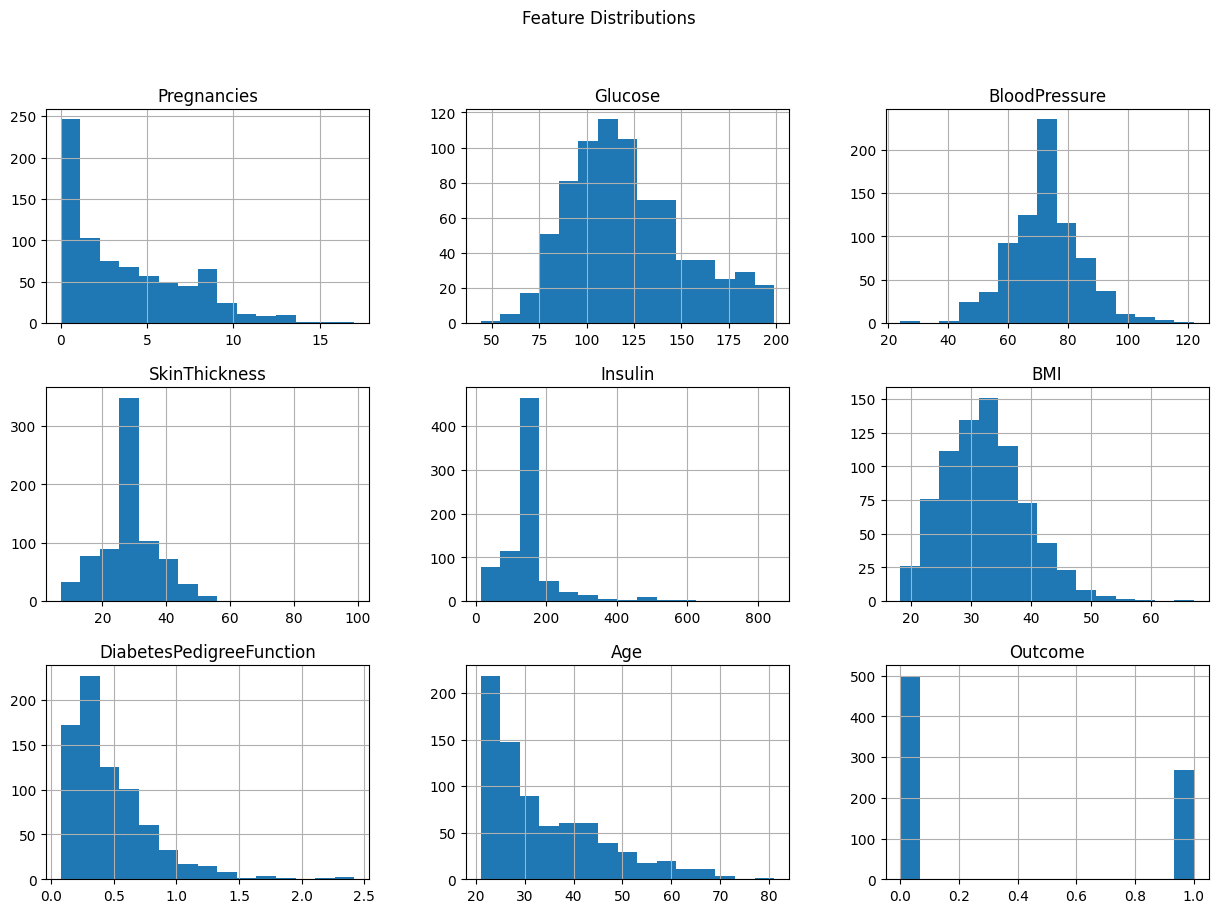

In [ ]:
# Visualize the distribution of each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# 2. kNN Algorithm Application

We’ll split the data into training and testing sets, and apply KNeighborsClassifier from sklearn.

In [ ]:
# Import the necessary library and function
from sklearn.model_selection import train_test_split
# Import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the kNN model with k=5 as a starting point
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) # accuracy_score is now defined and imported
print("Accuracy of kNN with k=5:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

NameError: name 'X' is not defined

# 3. Use Case Identification

Here are two use cases for kNN in real-world applications:

Customer Segmentation in Retail: kNN can be used to classify customers based on purchase patterns, demographics, and other features, helping businesses target specific segments with personalized marketing strategies.

Medical Diagnosis: kNN is applied in healthcare to classify patients based on symptoms, medical history, and test results. For example, predicting whether a patient has diabetes based on health indicators.



###**3.1. Case 1**

###**3.2. Case 2**

# Parameter Experimentation

To find the optimal k, we’ll run kNN with different values of k and observe changes in model accuracy.

In [ ]:
# Experiment with different values of k and store the accuracies
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy for Different k Values')
plt.show()


NameError: name 'X_train' is not defined

# Train-Test Split Analysis

We’ll test different train-test split ratios and analyze their impact on accuracy.

In [ ]:
# Define different train-test splits
splits = [0.5, 0.6, 0.7, 0.8]
split_accuracies = []

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    split_accuracies.append(accuracy_score(y_test, y_pred))

# Plot train-test split ratio vs. accuracy
plt.figure(figsize=(10, 5))
plt.plot([f"{int(s*100)}-{int((1-s)*100)}" for s in splits], split_accuracies, marker='o')
plt.xlabel('Train-Test Split Ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Train-Test Splits')
plt.show()


NameError: name 'X' is not defined

# k-Fold Cross-Validation

Finally, we’ll perform k-fold cross-validation to assess model stability and reliability.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X, y, cv=5)

print("5-Fold Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Explanation of Each Section
Data Preprocessing: We imported necessary libraries, loaded the data, and explored it to identify missing values and understand feature distributions.

kNN Algorithm Application: We applied kNN on the dataset with an initial k value of 5. The model was trained on 80% of the data, and we evaluated its accuracy, classification report, and confusion matrix.

Use Case Identification: Identified two real-world kNN applications—Customer Segmentation and Medical Diagnosis.

Parameter Experimentation: We experimented with different k values to observe their impact on model accuracy, finding the best-performing k.

Train-Test Split Analysis: Different train-test splits (e.g., 80-20, 70-30) were analyzed to understand their effect on model accuracy.

k-Fold Cross-Validation: Performed 5-fold cross-validation to get a reliable estimate of model performance across different data splits. This helps verify the consistency and reliability of the kNN model.